# Lead Lag Analysis for different circualtion metrics
# for GEOV302

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

In [97]:
# import file names
signal = ['moc_265N_time_series.npy','moc_max_time_series.npy', 'OSNAPeast_time_series.npy', 'OSNAPwest_time_series.npy', 'bsf_min_time_series.npy']
result = ['moc_265N_change_points.npz','moc_max_change_points.npz', 'OSNAPeast_change_points.npz', 'OSNAPwest_change_points.npz', 'bsf_min_change_points.npz']

# define metric names
name = ['MOC at 26.5°N', 'Maximum MOC', 'Minimum BSF at OSNAP East', 'Minimum BSF at OSNAP West', 'Minimum BSF in SPG']
save_name = ['moc_265N_lead_lag.png','moc_max_lead_lag.png', 'OSNAPeast_lead_lag.png', 'OSNAPwest_lead_lag.png', 'bsf_min_lead_lag.png']



In [50]:
# Load time series of all metrics
moc_265N_series = np.load('results/'+signal[0])
moc_max_series = np.load('results/'+signal[1])
OSNAPeast_series = np.load('results/'+signal[2])
OSNAPwest_series = np.load('results/'+signal[3])
bsf_min_series = np.load('results/'+signal[4])

series = [moc_265N_series, moc_max_series, OSNAPeast_series, OSNAPwest_series, bsf_min_series]

# Load npz files containing indices of change points
moc_265N_data = np.load('results/'+result[0])
moc_max_data = np.load('results/'+result[1])
OSNAPeast_data = np.load('results/'+result[2])
OSNAPwest_data = np.load('results/'+result[3])
bsf_min_data = np.load('results/'+result[4])

data = [moc_265N_data, moc_max_data, OSNAPeast_data, OSNAPwest_data, bsf_min_data]

# create time axis
time_monthly = np.arange(1850,1850+(len(moc_265N_series[:, 0])/12),1/12)

In [70]:
def lead_lag(target_array, comp_array, window_size):
    
    result = []
    # Iterate over target array
    for i in range(len(target_array)):
        target = target_array[f"array_{i}"]

        # extract each values of target array
        for t in target:

            # exclude end point index 
            if t == 3012:
                continue

            # extract each point from comparison array
            for idx in comp_array[f"array_{i}"]:

                # check if point from comparison array is within window of target value
                if np.logical_and(idx >= t - window_size, idx <= t + window_size):

                    # append difference between target and comparison value
                    result.append(t-idx)
    return result


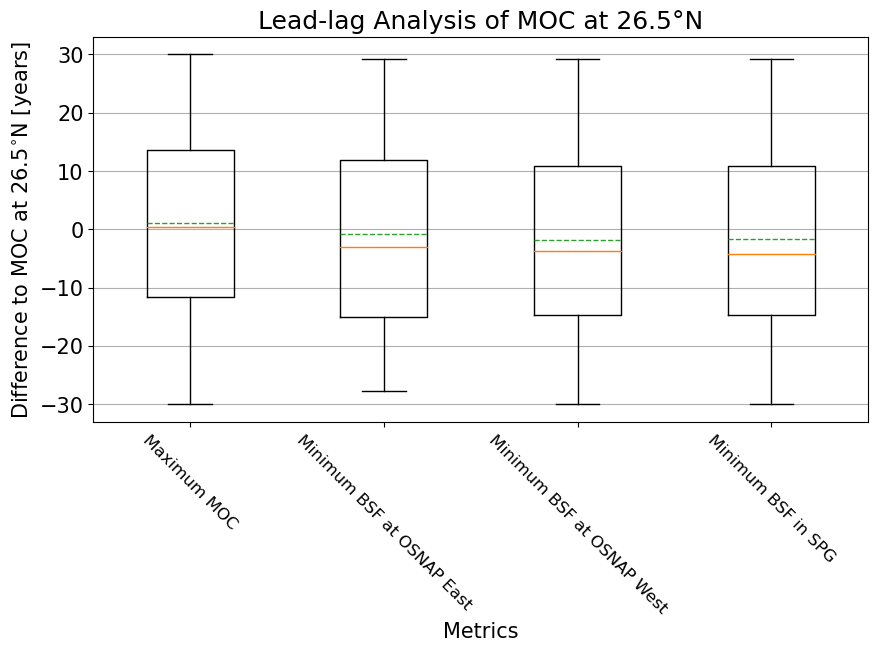

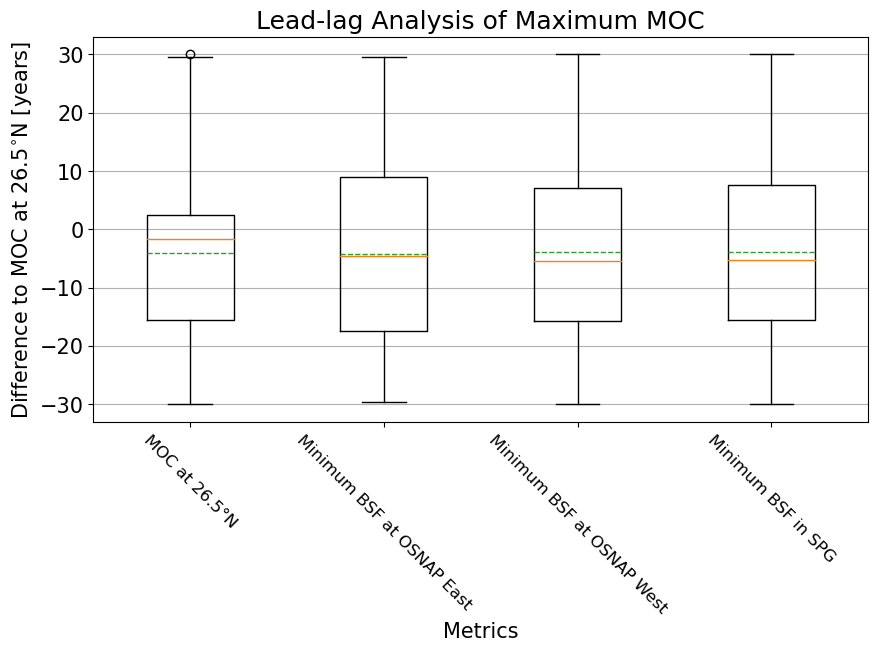

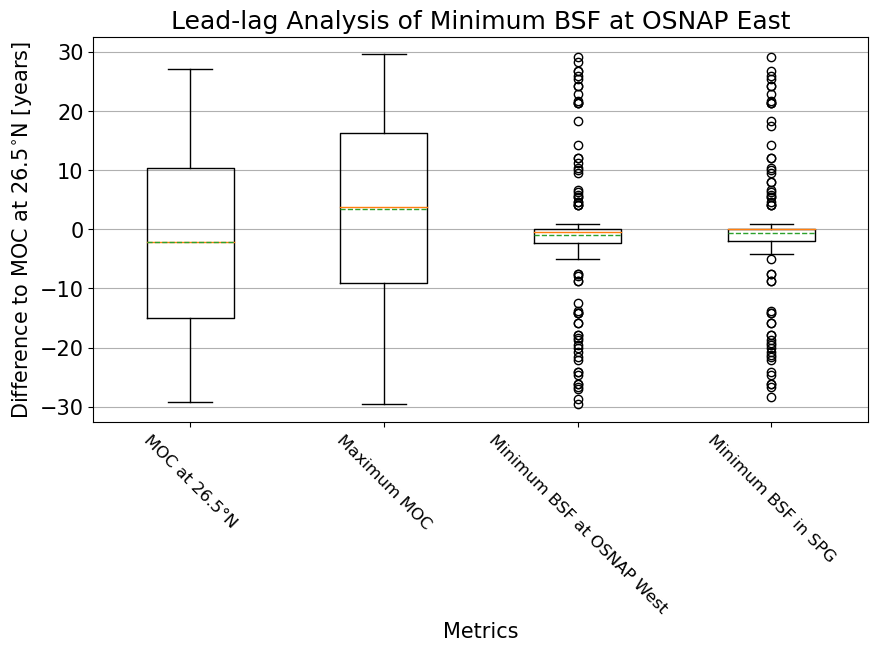

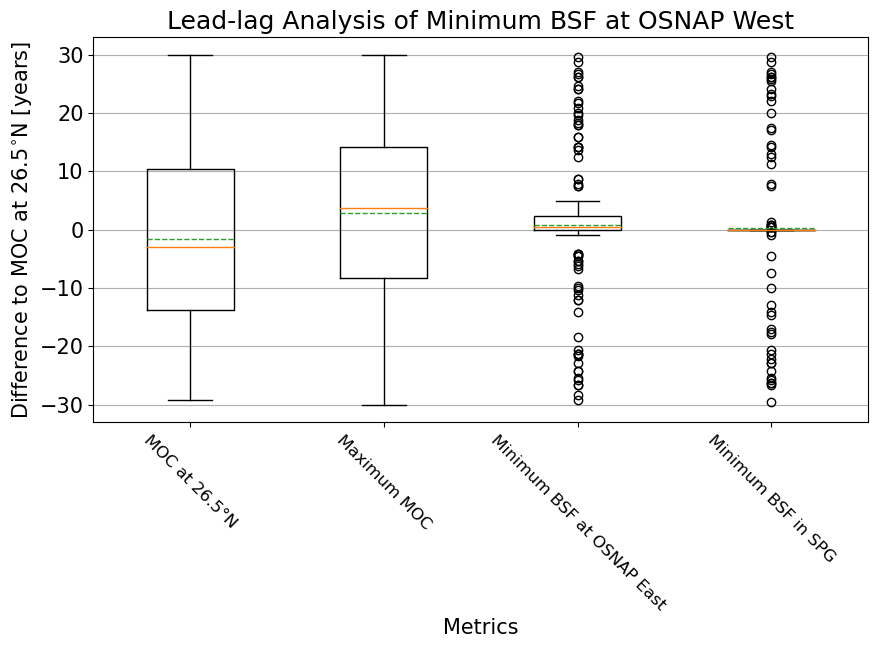

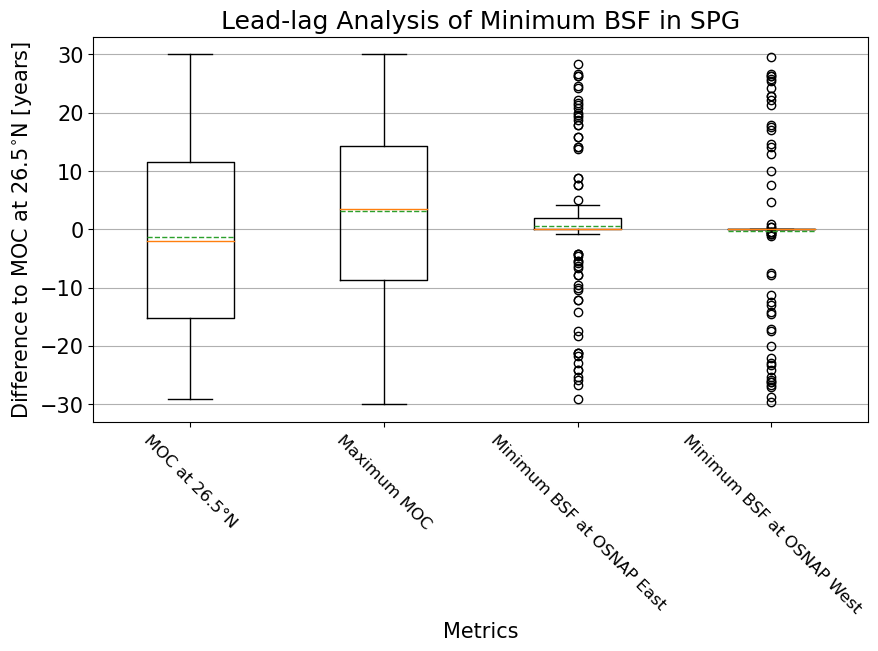

In [98]:
for k in range(len(data)):

    # Define the window size
    window_size = 30*12 # years

    lead_lag_result = []

    for j in range(len(data)):
        
        if k == j:
            continue
        
        target_array = data[k]
        comp_array = data[j]

        result = lead_lag(target_array, comp_array, window_size)

        lead_lag_result.append(result)

    # Extract and convert lists to NumPy arrays
    numpy_arrays = [np.array(lst) for lst in lead_lag_result]

    # Divide each array by 12
    divided_arrays = [arr / 12 for arr in numpy_arrays]
    
    # Extract all entries except for the one at the specified index
    name_k = np.concatenate((name[:k], name[k+1:]))
    
    ### plot box plot
    # create figure
    plt.figure(figsize=(10, 5))
    plt.title('Lead-lag Analysis of '+name[k], fontsize=18)
    plt.boxplot(divided_arrays, labels=name_k, meanline=True, showmeans=True)
    plt.xlabel('Metrics', fontsize=15)
    plt.ylabel(r'Difference to MOC at 26.5$^{\circ}$N [years]', fontsize=15)
    plt.xticks(fontsize=12, rotation=-45)
    plt.yticks(fontsize=15)
    plt.grid(axis='y')
    #plt.savefig('results/'+save_name[k], bbox_inches='tight')
    plt.show()